<font color='LightSkyBlue'>
<font size=6>
        
**Aprendiendo Pytorch**

<font color = 'MediumVioletRed'>
<font size = 5>
INSTALACIÓN

<font color = 'AntiqueWhite'>
<font size = 3>
Para instalar PyTorch en Manjaro, lo hacemos como se indica en la web oficial de <a href=https://pytorch.org//>PyTorch</a>. Teniendo en cuenta que ya estaba previamente instalado Anaconda.

In [83]:
# Verificamos la instalación
import torch
epsilon = torch.rand(5, 3)
print(epsilon)

tensor([[0.0517, 0.7967, 0.9703],
        [0.5379, 0.3032, 0.3835],
        [0.1268, 0.6430, 0.7084],
        [0.3979, 0.2542, 0.7608],
        [0.4370, 0.6844, 0.5995]])


In [84]:
# Verificamos if GPU is enable and accessible by PyTorch
torch.cuda.is_available()

True

In [85]:
# Se listan los paquetes instalados en el entorno virtual
!pip list

Package                   Version
------------------------- --------------
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
Brotli                    1.0.9
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
comm                      0.2.2
contourpy                 1.3.0
cycler                    0.12.1
debugpy                   1.8.8
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.2.2
executing                 2.1.0
fastjsonschema            2.20.0
filelock                  3.13.1
fonttools                 4.54.1
fqdn                      1.5.1
gmpy2                     2.1.2
h11                       0.14.0
httpcore

<font color = 'DeepPink'>
<font size = 5>
SIMPLE NEURAL NETWORK

In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [87]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module): # define una nueva clase llamada Model, que hereda de nn.Module. nn.Module es la base que PyTorch usa para crear todos los modelos.
    # Input layer (4 features of the flower) -->
    # Hidden Layer1 (number of neurons) -->
    # H2 (n) -->
    # output (3 classes of iris flowers)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3): # el número de características de entrada =4. h1=8, h2=9, estos son los tamaños de las dos capas ocultas. En este caso, las capas tendrán 8 y 9 neuronas, respectivamente. Este es el número de salidas del modelo, ya que queremos predecir 3 clases de flores.
        super().__init__() # instantiate our nn.Module. Llama al constructor de la clase padre (nn.Module)
        # Define la primera capa totalmente conectada (fc significa fully connected). Esta capa toma las 4 características de entrada y las convierte en 8 salidas (como indica h1=8).
        self.fc1 = nn.Linear(in_features, h1)
        # Define la segunda capa totalmente conectada. Toma 8 entradas (de la capa anterior) y las convierte en 9 salidas (como indica h2=9).
        self.fc2 = nn.Linear(h1, h2)
        # Define la capa de salida, que convierte las 9 entradas en 3 salidas. Estas 3 salidas representan las clases de las flores que queremos predecir.
        self.out = nn.Linear(h2, out_features)

    # El método forward define cómo los datos pasan a través de la red
    def forward(self, x):
        x = F.relu(self.fc1(x)) # envía los datos de entrada x a través de la primera capa fc1 y luego aplica la función de activación ReLU (Rectified Linear Unit).
        x = F.relu(self.fc2(x)) # envía los datos transformados x a través de la segunda capa fc2, nuevamente aplicando ReLU.
        x = self.out(x) # pasa los datos a través de la capa de salida out, sin aplicar ReLU, ya que esta es la última capa y se utiliza para predecir las clases.
        return x

In [88]:
# Pick a manual seed for randomization
torch.manual_seed(32)
# Create an instance of model
model = Model()

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
# Importamos los datos
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [91]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [92]:
# Consultamos las dimensiones del dataframe
print(my_df.shape)

(150, 5)


In [93]:
# Imprimimos las primeras filas del dataframe para verificar si cargaron exitosamente
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [94]:
# Imprimimos las últimas filas del dataframe para inspeccionar los datos
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [95]:
# Revisamos si en las columnas hay datos faltantes o nulos
my_df.isna().sum() # con el método .isna() de pandas buscamos valores nulos 

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [96]:
# Modificamos el dataframe de strings a integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

/tmp/ipykernel_9888/468780384.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [97]:
# Train Test Split!  Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [98]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [99]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: variety, Length: 150, dtype: float64

In [100]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [101]:
# Revisamos los datos
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [102]:
# Revisamos los datos
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32) # 0.2 porque es el 20% con lo que se entrena

In [126]:
# Convertimos X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [127]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [128]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [129]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [130]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 200
losses = []
for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train) # Get predicted results

    # Measure the loss/error, gonna be high at first
    loss = criterion(y_pred, y_train) # predicted values vs the y_train

    # Keep Track of our losses
    losses.append(loss.detach().numpy())

    # print every 10 epoch
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')
        
        # Do some back propagation: take the error rate of forward propagation and feed it back
        # thru the network to fine tune the weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Epoch: 0 and loss: 0.6327950954437256
Epoch: 10 and loss: 0.6151179671287537
Epoch: 20 and loss: 0.5942869782447815
Epoch: 30 and loss: 0.5720935463905334
Epoch: 40 and loss: 0.5515463352203369
Epoch: 50 and loss: 0.5323415994644165
Epoch: 60 and loss: 0.5134353041648865
Epoch: 70 and loss: 0.49485668540000916
Epoch: 80 and loss: 0.477662056684494
Epoch: 90 and loss: 0.4604797065258026
Epoch: 100 and loss: 0.44279518723487854
Epoch: 110 and loss: 0.42530542612075806
Epoch: 120 and loss: 0.4084540605545044
Epoch: 130 and loss: 0.39211928844451904
Epoch: 140 and loss: 0.3759360909461975
Epoch: 150 and loss: 0.3604087829589844
Epoch: 160 and loss: 0.34523534774780273
Epoch: 170 and loss: 0.3299826979637146
Epoch: 180 and loss: 0.3150666058063507
Epoch: 190 and loss: 0.300630122423172


Text(0.5, 0, 'Epoch')

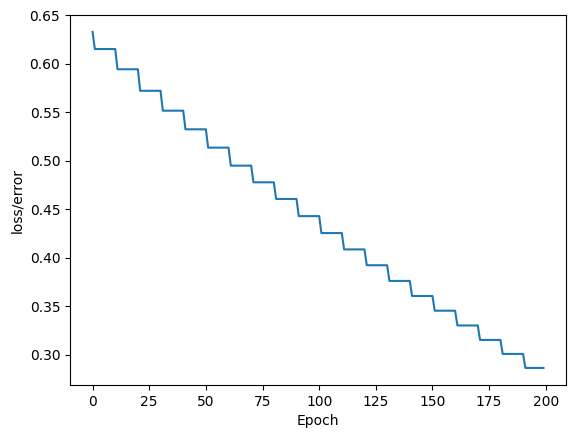

In [131]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

<font color = 'MediumVioletRed'>
<font size = 5>
EVALUANDO EL MODELO

In [132]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
    y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
    loss = criterion(y_eval, y_test) # Find the loss or error

In [133]:
loss

tensor(0.2620)

In [134]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        if y_test[i] == 0:
            x = "Setosa"
        elif y_test[i] == 1:
            x = "Versicolor"
        else:
            x = "Virginica"

        # We will us type of flower class our network thinks it is
        print(f'{i + 1}. {str(y_val)} \t {x} \t {y_val.argmax().item()}')

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'We got {correct} correct!')

1. tensor([-2.6491,  1.3182,  0.7721]) 	 Versicolor 	 1
2. tensor([ 2.1086, -0.9375, -2.9945]) 	 Setosa 	 0
3. tensor([ 1.9068, -0.7995, -2.8542]) 	 Setosa 	 0
4. tensor([-2.5879,  1.3326,  0.6285]) 	 Versicolor 	 1
5. tensor([-4.7017,  1.6757,  2.3466]) 	 Virginica 	 2
6. tensor([-4.7496,  1.8139,  2.0885]) 	 Virginica 	 2
7. tensor([ 1.7511, -0.6892, -2.7561]) 	 Setosa 	 0
8. tensor([ 1.8804, -0.7909, -2.8106]) 	 Setosa 	 0
9. tensor([-2.1372,  1.2361,  0.2956]) 	 Versicolor 	 1
10. tensor([ 2.1334, -0.9464, -3.0335]) 	 Setosa 	 0
11. tensor([-3.2385,  1.4925,  1.1349]) 	 Versicolor 	 1
12. tensor([-4.9601,  1.5532,  2.5827]) 	 Virginica 	 2
13. tensor([-2.1720,  1.1572,  0.5836]) 	 Versicolor 	 1
14. tensor([-1.7052,  1.2112,  0.0075]) 	 Versicolor 	 1
15. tensor([-4.5993,  1.5608,  2.2781]) 	 Virginica 	 2
16. tensor([-5.2523,  1.5470,  2.9527]) 	 Virginica 	 2
17. tensor([-2.6775,  1.2797,  0.8042]) 	 Versicolor 	 1
18. tensor([-4.3497,  1.5194,  2.1290]) 	 Virginica 	 2
19. tenso

<font color = 'MediumVioletRed'>
<font size = 5>
PROBANDO EL MODELO

In [135]:
# Probando 
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [136]:
with torch.no_grad():
    print(model(new_iris))

tensor([ 2.0111, -0.8980, -2.8536])


In [137]:
# Probando 
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [138]:
with torch.no_grad():
    print(model(newer_iris))

tensor([-4.0786,  1.4732,  1.8981])


<font color = 'MediumVioletRed'>
<font size = 5>
SAVE OUR NN MODEL

In [140]:
# Save our NN Model
torch.save(model.state_dict(), 'simple_iris_model.pt')

In [141]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('simple_iris_model.pt'))

/tmp/ipykernel_9888/1378867653.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('simple_iris_model.pt'))


<All keys matched successfully>

In [142]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)